# Examine mutations

In [1]:
# load libraries
library(tidyverse)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# Load the mutation data
mutations_raw <- data.table::fread('paper/mutations.tsv')

In [3]:
# inspect data
head(mutations_raw, n=2)

rank,mutation,mean/stddev,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci lower,emerged in lineages
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ORF1b:P314L,976.504,207066,0.167013,0.166678,0.167348,1.18177,1.18137,1.18217,"B.1, B.59"
2,S:D614G,761.484,125918,0.127920,0.127591,0.128250,1.13646,1.13609,1.13684,"A.18, A.19, A.2.5, B.1, B.4.8, B.59"


In [4]:
# extract substition information
mutations_raw %>% 
    select(rank, mutation) %>% 
    mutate(protein = sapply(strsplit(x = mutation, split=':', fixed=T), `[`, 1)) %>%
    mutate(aachange = sapply(strsplit(x = mutation, split=':', fixed=T), `[`, 2)) %>%
    mutate(aa_from = substr(aachange,1,1)) %>%
    mutate(aa_to = substr(aachange,nchar(aachange),nchar(aachange))) -> mutation_info

In [5]:
# inspect
head(mutation_info)

rank,mutation,protein,aachange,aa_from,aa_to
<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ORF1b:P314L,ORF1b,P314L,P,L
2,S:D614G,S,D614G,D,G
3,S:P681H,S,P681H,P,H
4,S:P681R,S,P681R,P,R
5,S:Y144-,S,Y144-,Y,-
6,S:N501Y,S,N501Y,N,Y


In [6]:
# Get counts of each substitution
mutation_info %>% 
    group_by(aa_from, aa_to) %>%
    summarise( count = n() ) %>%
    arrange(desc(count))-> substitution_count_data

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.



In [7]:
# Look at top substitutions
substitution_count_data  %>% head(10)

aa_from,aa_to,count
<chr>,<chr>,<int>
T,I,187
A,V,134
L,F,94
P,S,78
A,S,75
P,L,70
M,I,57
V,F,57
D,Y,50


In [8]:
write.table(substitution_count_data, 'paper/top_substitions/top_substitions.csv')

In [9]:
generate_substitions_plots <- function(substitution_count_data) {
    substitution_count_data %>%
        ggplot(aes(x=aa_from, y=count)) + 
        geom_bar(stat='identity') +
        ggtitle('Substitions From') -> p_from
    substitution_count_data %>%
        ggplot(aes(x=aa_to, y=count)) + 
        geom_bar(stat='identity') +
        ggtitle('Substitions From') -> p_to
    substitution_count_data %>% 
        ggplot(aes(x=aa_from,y=aa_to,fill=count)) +
        geom_tile() + 
        geom_text(aes(label=count), size=1) +
        ggtitle("Heatmap of aa substitutions") -> p_heat
    grid.arrange(p_heat, p_from, p_to, ncol=3) -> p
    invisible(p)
}

TableGrob (1 x 3) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (1-1,3-3) arrange gtable[layout]

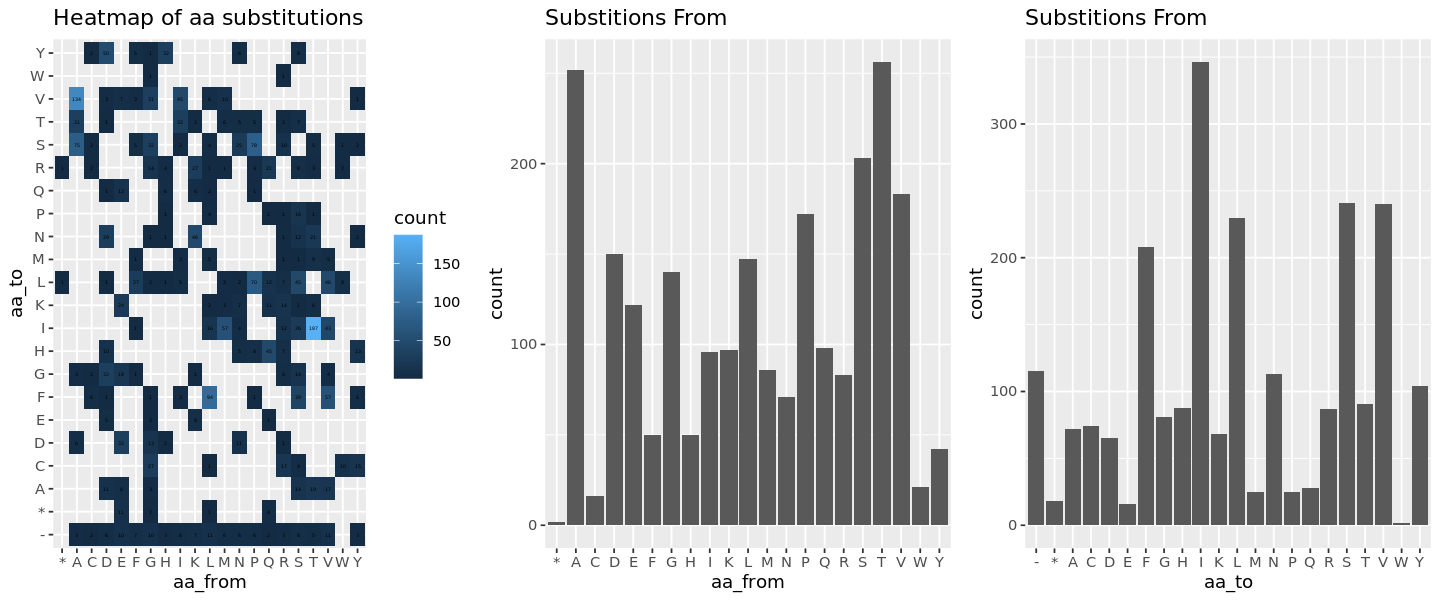

In [10]:
options(repr.plot.width = 12, repr.plot.height = 5)
generate_substitions_plots(substitution_count_data) -> p
p

In [11]:
ggsave("paper/top_substitions/top_substitions.png", w=12,h=5,plot=p)

# Stratify by gene

In [12]:
# get list of genes
mutation_info %>% 
    pull(protein) %>% 
    unique() -> gene_list

## ORF1b

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.



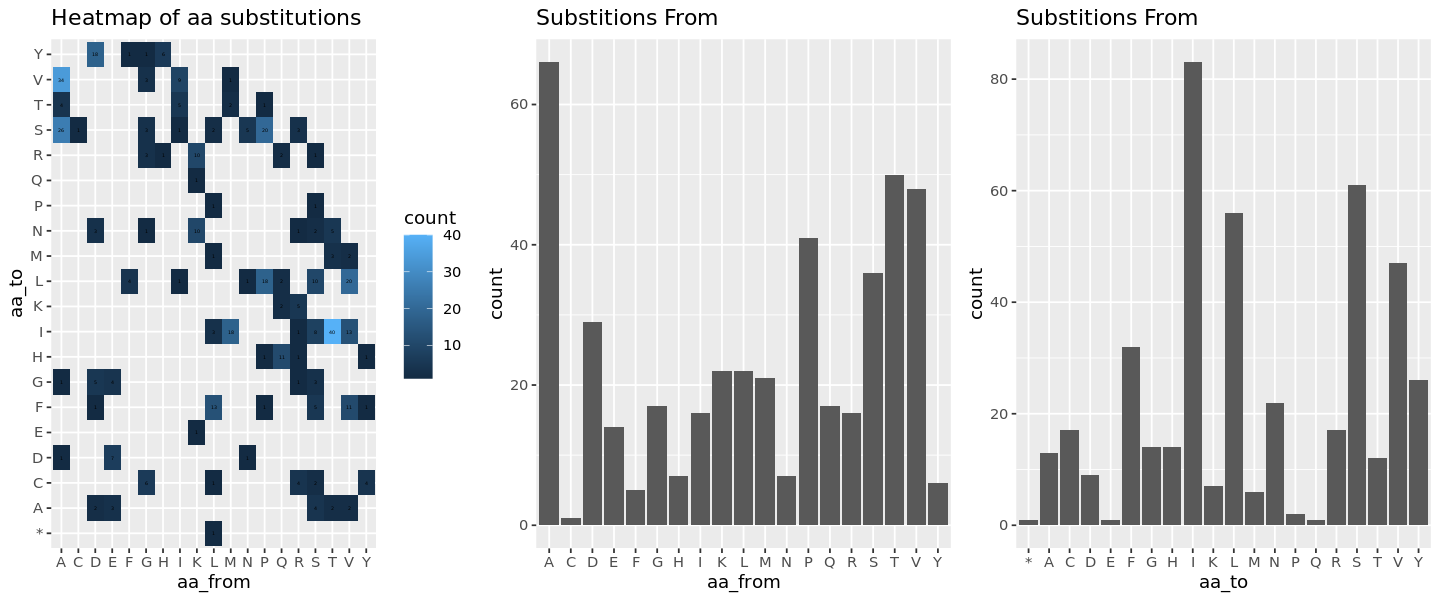

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.



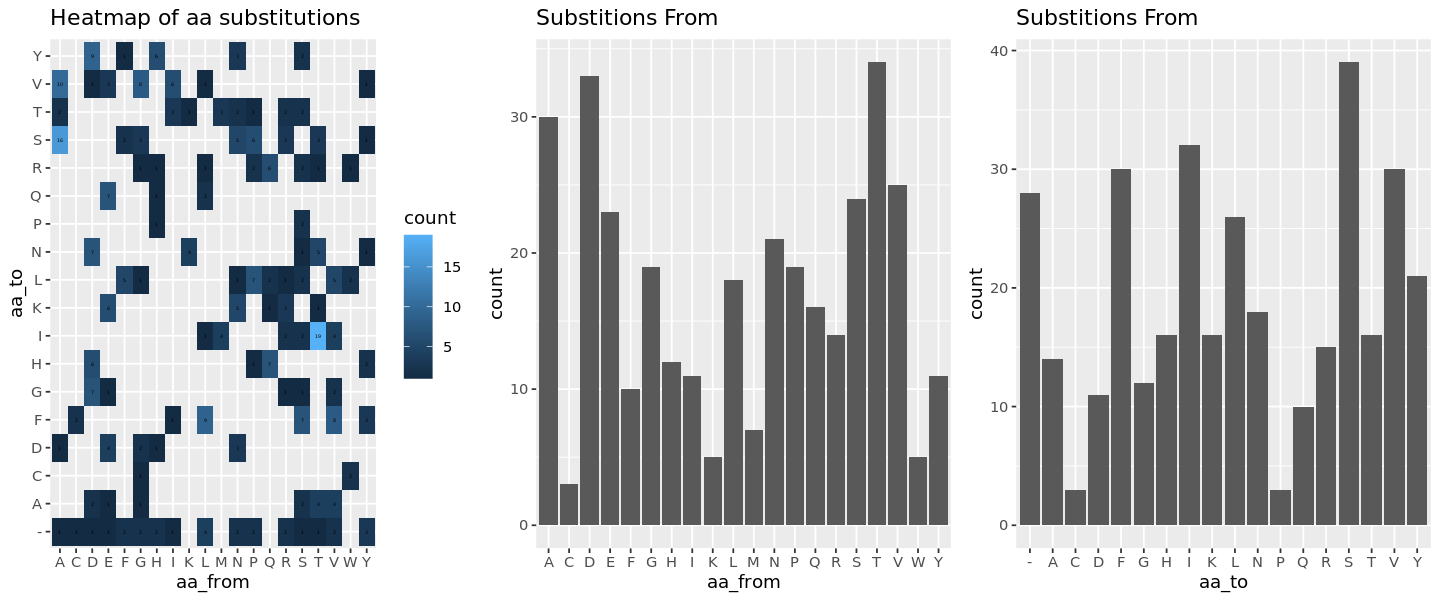

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.



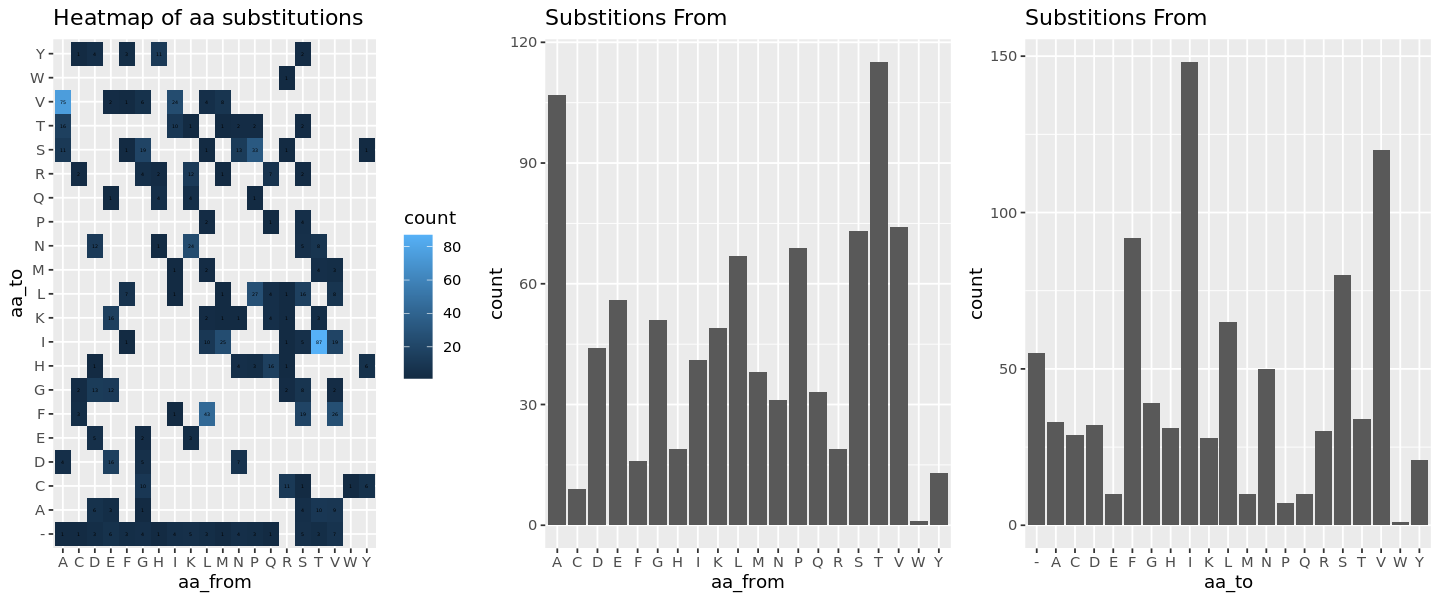

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.



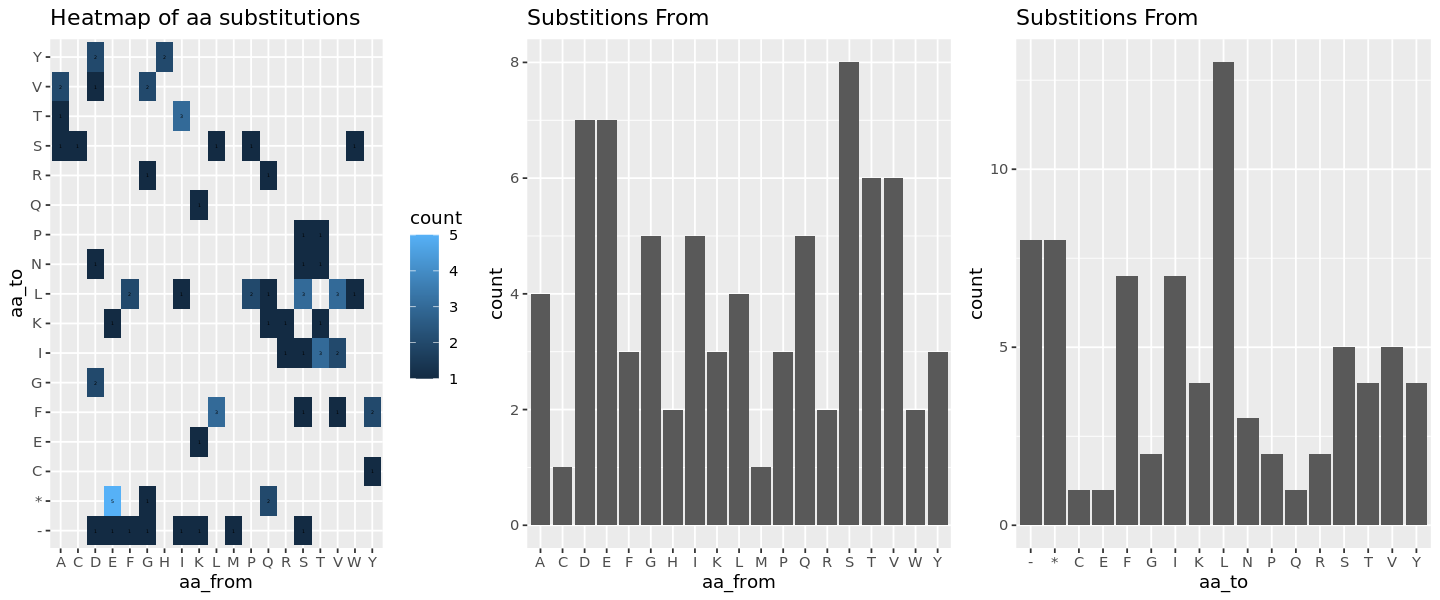

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.



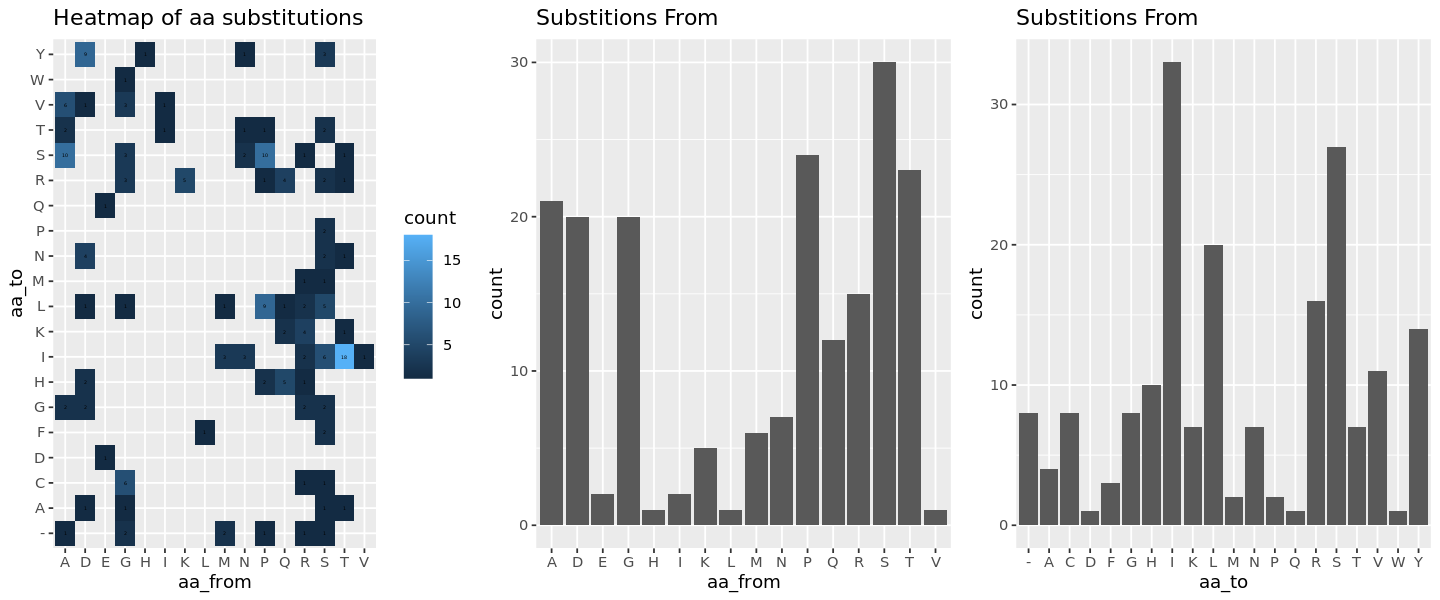

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.



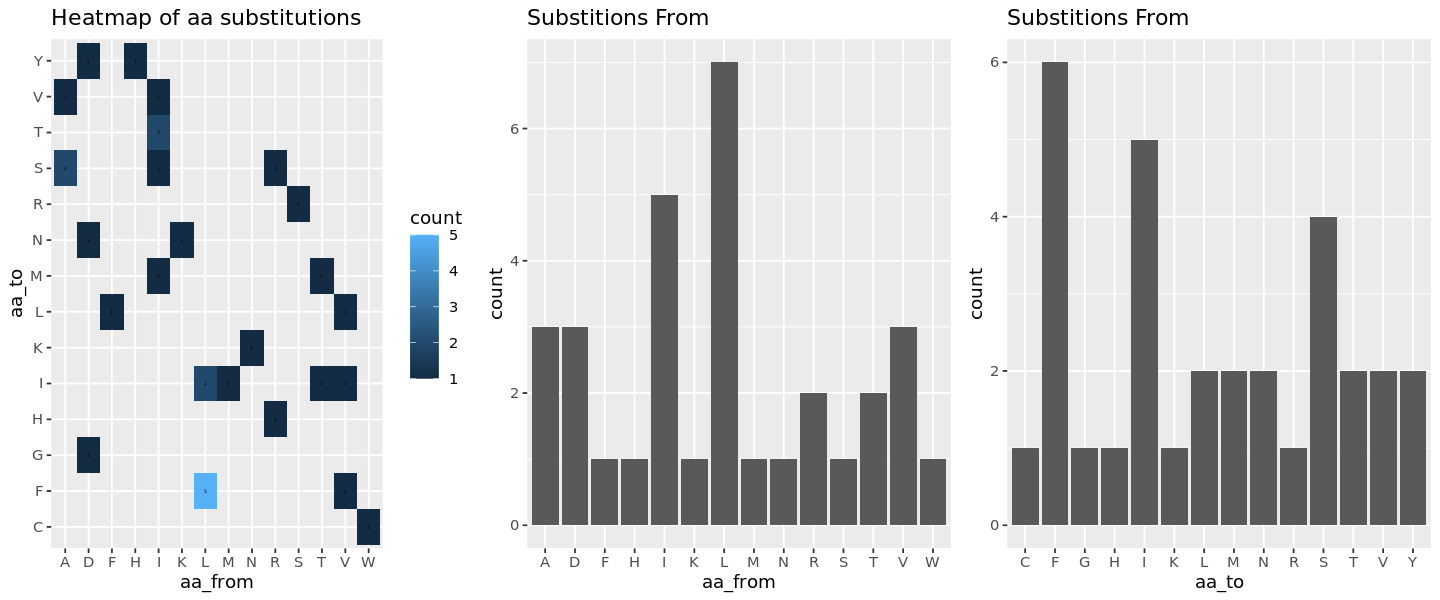

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.



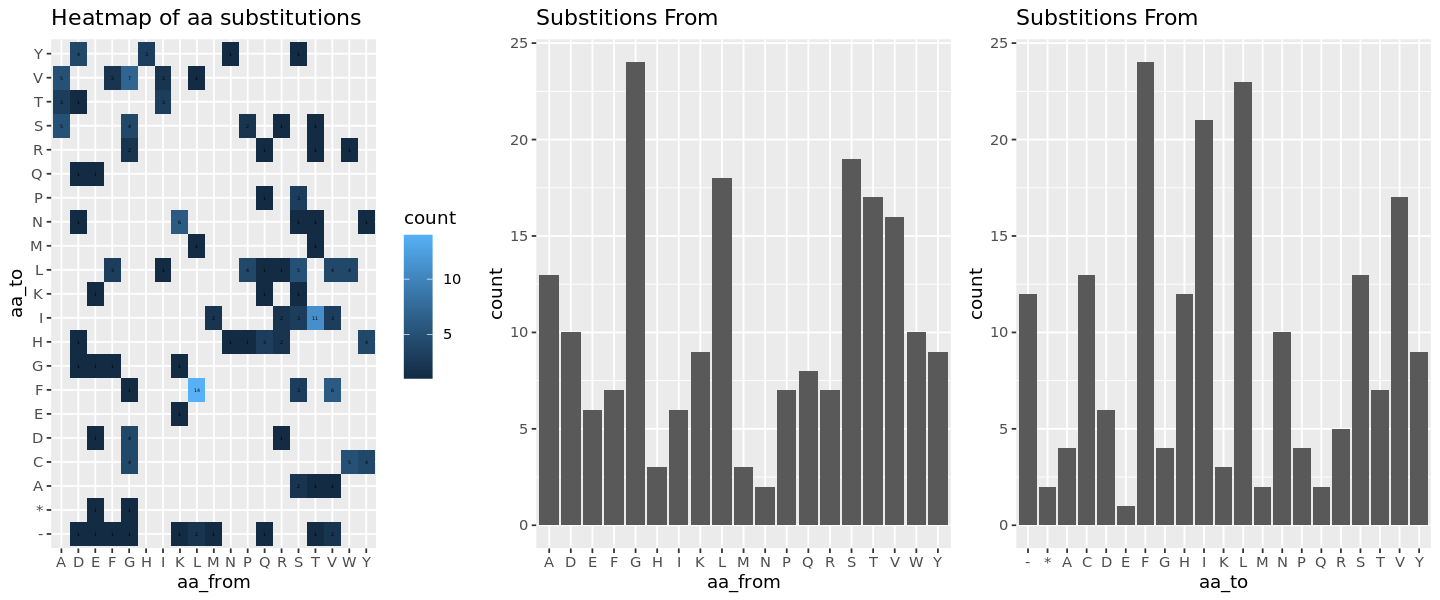

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.



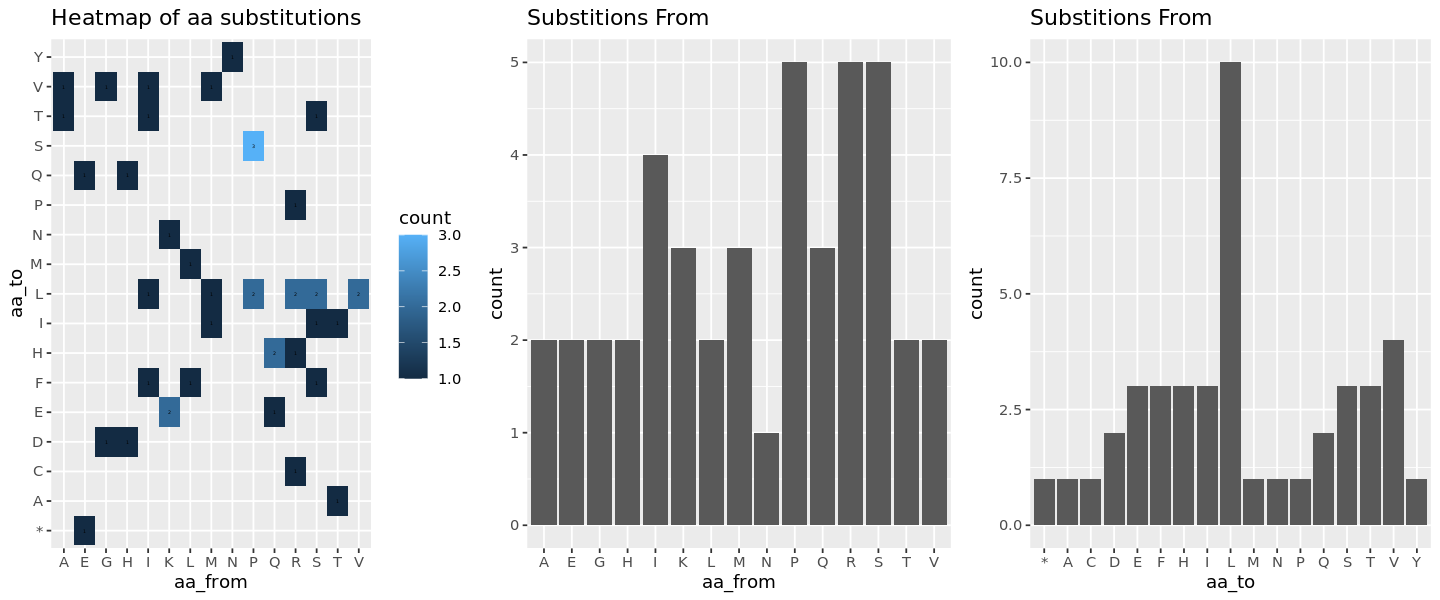

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.



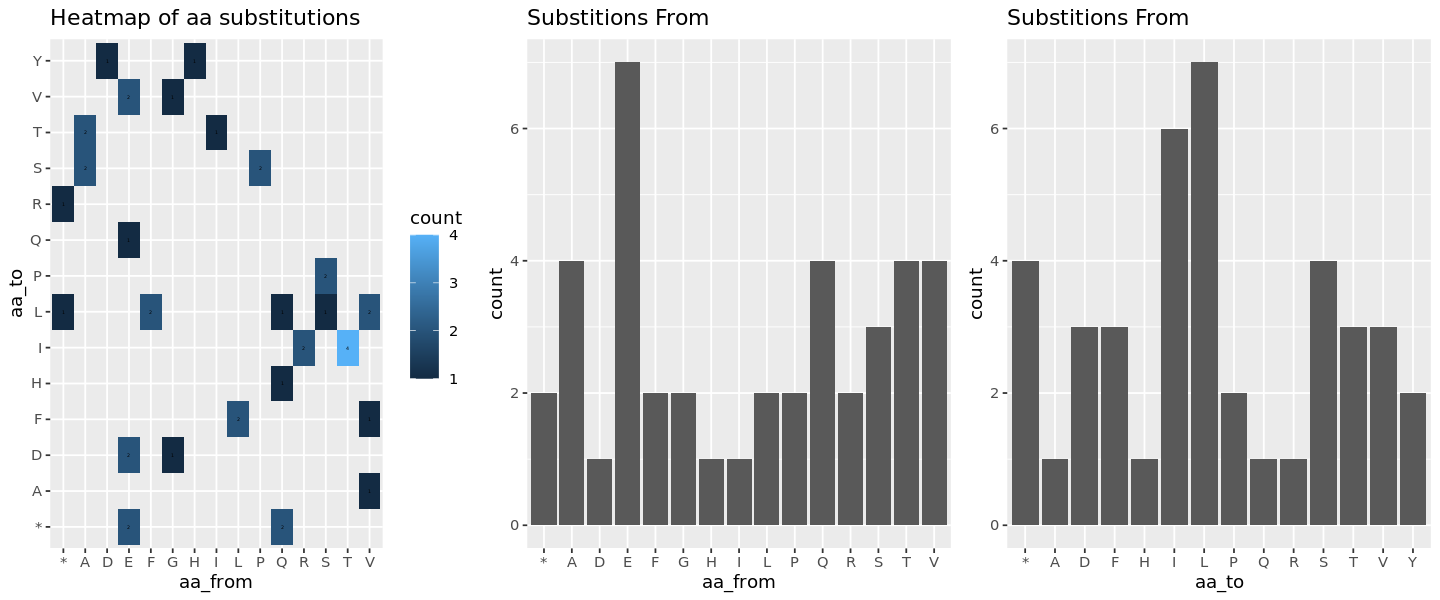

`summarise()` has grouped output by 'aa_from'. You can override using the `.groups` argument.



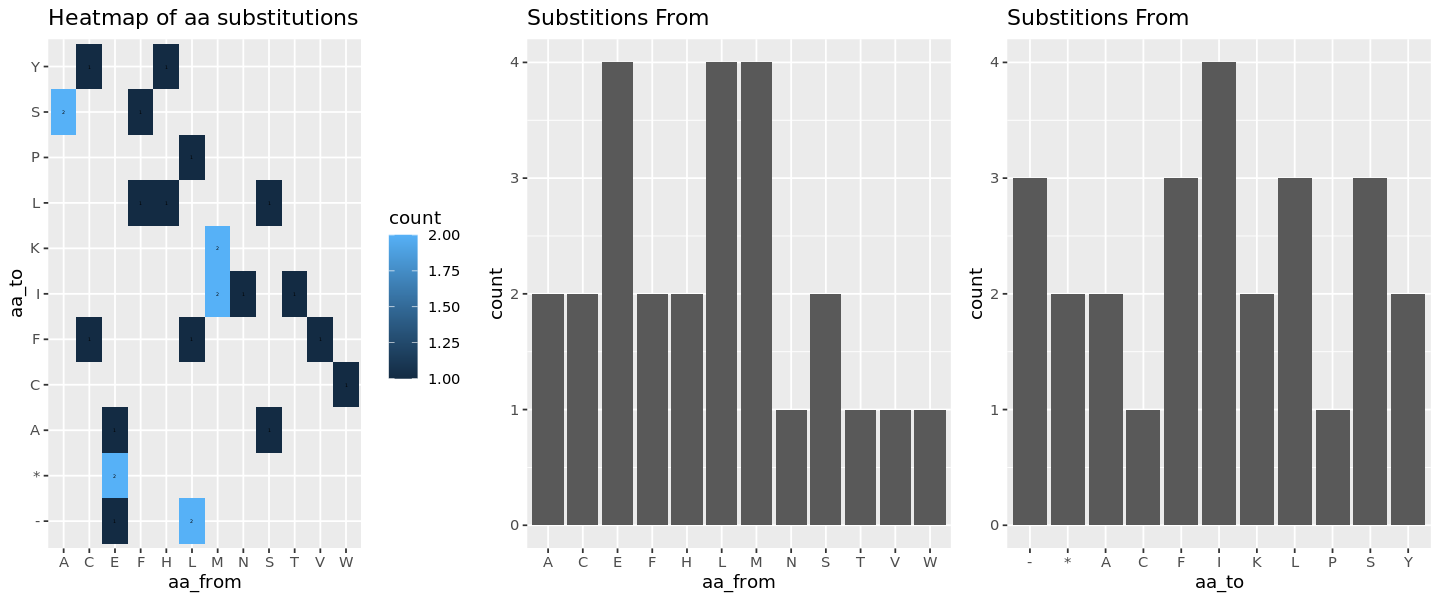

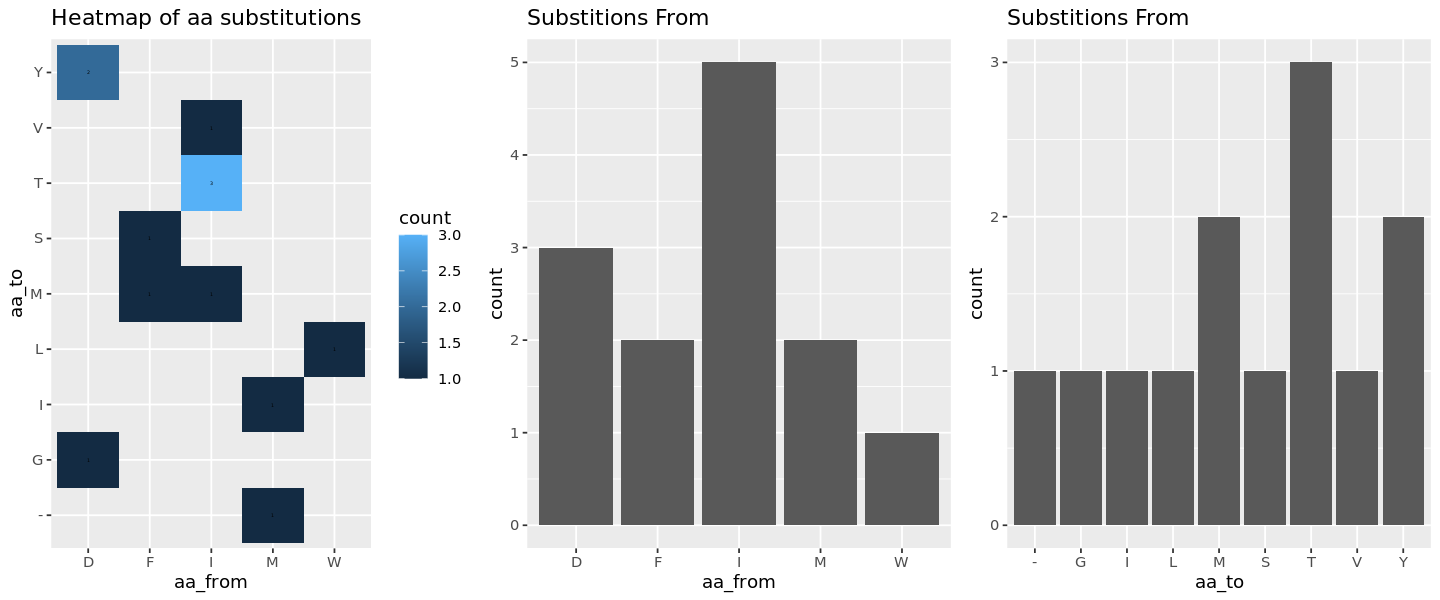

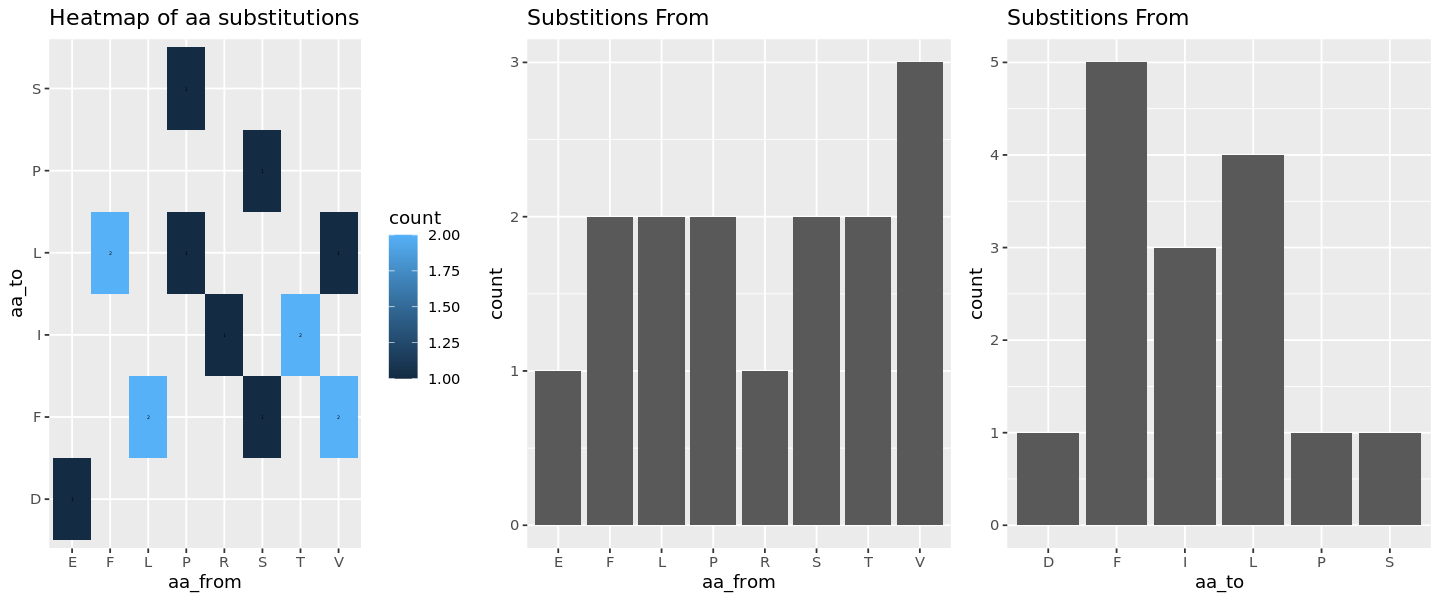

In [14]:
for (g in gene_list) {
    mutation_info %>% 
        filter(protein == g) %>%
        group_by(aa_from, aa_to) %>%
        summarise( count = n() ) %>%
        arrange(desc(count)) -> gene_mutation_info
    
    write.table(gene_mutation_info, file = paste0("paper/top_substitions/top_substitutions__",g,".csv"))
    
    generate_substitions_plots(gene_mutation_info) -> p_gene
    
    ggsave(filename = paste0("paper/top_substitions/top_substitutions__",g,".png"), plot = p_gene, w= 12,h=5)
}